# Меры близости
Кокоулина Мария

Чтение текстов из файла

In [7]:
import pandas as pd

In [8]:
def read_text(name):
    try:
        df = pd.read_excel(name)
        return df
    except:
        return "Ошибка при чтении файла"

Токенизация и лемматизация

In [9]:
import nltk
import string
import pymorphy2
import nltk
from nltk.corpus import stopwords

In [10]:
def lemmatization(l):
    # Убираем цифры
    for d in '1234567890\'/':
        l=l.replace(d, ' ')
    # Разделяем текст на слова и знаки препинания
    tokens = nltk.word_tokenize(l)
    # Избавляемся от знаков препринания и чисел. Используем генераторы
    tokens = [i for i in tokens if ( i not in string.punctuation )]
    tokens = [i for i in tokens if ( i not in {"«", "»", "\"", "``", "''", "–", "..", "...", "‘", "’", "—"} )]
    tokens=[i for i in tokens if i not in stopwords.words('russian')]
    pymorph = pymorphy2.MorphAnalyzer()
    a=[]
    for word in tokens:
        a.append(pymorph.parse(word)[0].normal_form)
    return a

Читаем тексты:

In [11]:
#Вопросы и ответы
df=read_text('questions.xlsx')
questions=[]
for text in df['question']:
    w=lemmatization(text)
    questions.append(w)
answers=[]
for text in df['answer']:
    w=lemmatization(text)
    answers.append(w)
#Мой тект с описаниями фильмов на русском 
df2=read_text('films.xlsx') 
films=[] 
for text in df2['film']: 
    w=lemmatization(text) 
    films.append(w) 
descriptions=[] 
for text in df2['description']: 
    w=lemmatization(text) 
    descriptions.append(w)

## 1. Счетчик

In [14]:
import scipy.spatial
import math

In [15]:
def counter(task, sentences):
    tokens=set(task)
    t=[task.count(token) for token in tokens]
    vectors = [[sentence.count(token) for token in tokens]
            for sentence in sentences]
    results=[]
    for i, sentence in enumerate(sentences):
        results.append(scipy.spatial.distance.cosine(t, vectors[i]))
    minim=1
    mini=-1
    for i, a in enumerate(results):
        if a<minim:
            mini=i
            minim=a
    return(mini)
        
    

In [40]:
#Вопросы и ответы
true_answers=0
for i, question in enumerate(questions):
    res=counter(question, answers)
    print(df['question'][i])
    print(res+1, df['answer'][res])
    if (i==res):
        true_answers=true_answers+1
print(true_answers/len(questions)*100)

1. Что такое программирование?
1 Программирование – это процесс создания компьютерной программы, включающий в себя проектирование программы, использование алгоритмов, написание кода программы и так далее.
2. Как работает программный код?
1 Программирование – это процесс создания компьютерной программы, включающий в себя проектирование программы, использование алгоритмов, написание кода программы и так далее.
3. Что такое отладка?
3 Отладка – это процесс поиска и устранения ошибок в программе.
4. Назовите типы ошибок, которые могут возникнуть в программе
21 Операторы – это специальные символы, которые используются в коде программы для выполнения определенных операций над данными. Операторы могут быть арифметическими, логическими, реляционными и присваивающими.
5. Расскажите о синтаксических ошибках
5 Синтаксическая ошибка возникает, когда в коде программы допущена опечатка или есть несоответствие правилам используемого языка в языковой конструкции, имени переменной, функции и так далее.

In [17]:
#Фильмы и описания
true_answers=0
for i, film in enumerate(films):
    res=counter(film, descriptions)
    print(i, df2['film'][i])
    if (res!=-1):
        print(res, df2['description'][res])
    else:
        print("Ответ не найден!")
    if (i==res):
        true_answers=true_answers+1
print(true_answers/len(films)*100)

0 Волк с Уолл-стрит
0 Провокационная комедия «Волк с Уолл-стрит» неподражаемого Мартина Скорсезе — настоящий подарок для ценителей качественных кинокартин. Наслаждайтесь видео в хорошем качестве бесплатно на сайте videomore.ru. События разворачиваются вокруг жизни брокера-авантюриста Джордана Белфорта. Итак, Нью-Йорк, 1987 год. Белфорт в исполнении Леонардо ДиКаприо устраивается работать в крупный инвестиционный банк. Его наставником назначают кутилу и наркомана Марка Ханна (Мэттью МакКонахи). Однако вскоре компания закрывается, и Джордану приходится открыть собственную фирму вместе с соседом Донни (Джона Хилл). Их дела быстро идут в гору. По советам Ханна, Белфорт начинает вести разгульный образ жизни. Он, не задумываясь, тратит деньги на вечеринки, наркотики и проституток. Естественно, это приводит к кризису в отношениях с женой Терезой (Кристиан Милиоти). Но скоро у волка с Уолл-Стрит появляется новая возлюбленная — головокружительная модель Наоми (Марго Робби). Пара женится, у них 

Таким образом, можно видеть, что для обоих текстов (и для вопросов, и для моего про фильмы) процент попадания в верный результат при использовании счетчика 54% и 57,5%.

## 2. Счетчик + расстояние Левенштейна

In [18]:
from fuzzywuzzy import fuzz

C:\Users\Mariia\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [37]:
def counter_plus_Levenshtain(task, sentences):
    tokens=set(task)
    t=[task.count(token) for token in tokens]
    vectors=[]
    for sentence in sentences:
        w=[]
        for token in tokens:
            i=0
            for word in sentence:
                if fuzz.ratio(word, token)>70: 
                    i=i+1
            w.append(i)
        vectors.append(w)
    results=[]
    for i, sentence in enumerate(sentences):
        results.append(scipy.spatial.distance.cosine(t, vectors[i]))
    minim=1
    mini=-1
    for i, a in enumerate(results):
        if a<minim:
            mini=i
            minim=a
    return(mini)

In [41]:
#Вопросы и ответы
true_answers=0
for i, question in enumerate(questions):
    res=counter_plus_Levenshtain(question, answers)
    print(df['question'][i])
    print(res+1, df['answer'][res])
    if (i==res):
        true_answers=true_answers+1
print(true_answers/len(questions)*100)

1. Что такое программирование?
6 Runtime error возникает в случае, когда программа пытается совершить нелегитимное действие, например, поделить на ноль. Ошибка времени выполнения может появиться на любом этапе работы программы, когда совершается неправильное действие. В случае возникновения этой ошибки машина останавливает выполнение программы и может показать диагностическое сообщение, объясняющее суть ошибки.
2. Как работает программный код?
21 Операторы – это специальные символы, которые используются в коде программы для выполнения определенных операций над данными. Операторы могут быть арифметическими, логическими, реляционными и присваивающими.
3. Что такое отладка?
3 Отладка – это процесс поиска и устранения ошибок в программе.
4. Назовите типы ошибок, которые могут возникнуть в программе
12 Зарезервированные или ключевые слова – это слова и выражения, которые имеют предопределенные значения и не могут использоваться при написании кода для иных целей, например, для именования пер

35. Как работает алгоритм?
1 Программирование – это процесс создания компьютерной программы, включающий в себя проектирование программы, использование алгоритмов, написание кода программы и так далее.
42.857142857142854


In [42]:
#Фильмы и описания
true_answers=0
for i, film in enumerate(films):
    res=counter_plus_Levenshtain(film, descriptions)
    print(i, df2['film'][i])
    if (res!=-1):
        print(res, df2['description'][res])
    else:
        print("Ответ не найден!")
    if (i==res):
        true_answers=true_answers+1
print(true_answers/len(films)*100)

0 Волк с Уолл-стрит
0 Провокационная комедия «Волк с Уолл-стрит» неподражаемого Мартина Скорсезе — настоящий подарок для ценителей качественных кинокартин. Наслаждайтесь видео в хорошем качестве бесплатно на сайте videomore.ru. События разворачиваются вокруг жизни брокера-авантюриста Джордана Белфорта. Итак, Нью-Йорк, 1987 год. Белфорт в исполнении Леонардо ДиКаприо устраивается работать в крупный инвестиционный банк. Его наставником назначают кутилу и наркомана Марка Ханна (Мэттью МакКонахи). Однако вскоре компания закрывается, и Джордану приходится открыть собственную фирму вместе с соседом Донни (Джона Хилл). Их дела быстро идут в гору. По советам Ханна, Белфорт начинает вести разгульный образ жизни. Он, не задумываясь, тратит деньги на вечеринки, наркотики и проституток. Естественно, это приводит к кризису в отношениях с женой Терезой (Кристиан Милиоти). Но скоро у волка с Уолл-Стрит появляется новая возлюбленная — головокружительная модель Наоми (Марго Робби). Пара женится, у них 

9 Дурак
9 Социальная драма, снятая в 2014 году режиссером Юрием Быковым («Майор»). Честное и бескомпромиссное кино не оставит равнодушным зрителей, которые не боятся заглянуть в лицо жестокой действительности. Убедиться в этом можно, если картину «Дурак» смотреть онлайн в хорошем качестве. Действие происходит в одном из провинциальных городов России. Приехав на вызов в общежитие, сантехник Дмитрий обнаруживает на девятиэтажке гигантскую трещину, из-за которой здание вот-вот рухнет. Герой решает обратиться напрямую к мэру города и оказывается в ресторане, где она празднует юбилей в кругу всей местной чиновничьей элиты. «Мама» и ее коллеги начинают обсуждать, что грозит каждому из них, если здание обвалится, но никто не спешит на помощь к людям, которые могут погибнуть. Как далеко готовы зайти чиновники, чтобы уберечь собственные шкуры? Сможет ли Дмитрий в одиночку спасти 800 человек из общежития?
10 Месть от кутюр
10 Австралийская трагикомедия 2015 года, которая покорит вас нетривиальны

18 Без тормозов
18 это драйвовая французская комедия о веселой семейке, попавшей в нешуточную дорожную передрягу. Полное юмора и адреналина кино, которое вы можете смотреть онлайн в хорошем качестве, подарит вам множество приятных минут у экрана. Парижский пластический хирург Том Кокс получает долгожданный отпуск и планирует вывезти к морю любимых родственников – беременную жену Жюли, сына Ноя и дочь Лисон школьного возраста, а также темпераментного деда Бена, который не пропускает ни одной юбки, попавшей в его поле зрения. Пестрая компания загружается в роскошный красный минивэн, арендованный Томом, но стоит водителю включить круиз-контроль, как у авто отказывают тормоза. Героев ожидает полная приключений поездка по оживленной магистрали на скорости 140 км/ч с полицейскими на хвосте и гигантской пробкой впереди.
19 Трансформеры
19 Фильм  картина о войне инопланетных роботов – автоботов и десептиконов, способных трансформироваться в самую различную технику и металлические объекты. Мног

29 Невозможное
3 Остросюжетный криминальный триллер «Номер 44», критикующий советскую эпоху, не был выпущен в российский кинотеатральный прокат из-за множества исторических несоответствий, найденных экспертами. Согласиться или поспорить с ними вы можете, оценив работу шведско-американского режиссера чилийского происхождения Даниэля Эспиносы онлайн в хорошем качестве. Действие ленты разворачивается в СССР начала 50-х. Бывший детдомовец, а ныне герой ВОВ и высокопоставленный сотрудник МГБ Лев Демидов (Том Харди) подозревает, что гибель сына его коллеги – дело рук маньяка. Несмотря на следы насилия на теле мальчика, найденного в районе московских железнодорожных путей, глава МГБ Кузьмин (Венсан Кассель), следуя сталинской формулировке о том, что в социалистическом обществе не может быть преступности, классифицирует убийство как несчастный случай и закрывает дело. Тучи над несогласным Демидовым начинают сгущаться – коварный сослуживец Василий Никитин (Юэль Киннаман) старается повесить на е

Таким образом, можно видеть, что для текстов процент попадания в верный результат снизился в разной мере. Так, для вопросов-ответов результат сильно уменьшился (43%), так как все вопросы на одну тему, связанную с программированием. Для фильмов данный показатель изменился не сильно (51,5%), так как все фильмы разные по содержанию и тексты содержат разные слова 

## 3. TF-IDF

In [21]:
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
def tf_idf(tasks, sentences):
    s=[]
    for sentence in sentences:
        z=' '.join(sentence)
        s.append(z)
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(s)
    vector=[list(i) for i in csr_matrix(X).toarray()]
    #print(vectorizer.get_feature_names())
    true_answers=0
    for j, task in enumerate(tasks):       
        z=' '.join(task)
        t=csr_matrix(vectorizer.transform([z])).toarray()[0]
        #print(t)
        results=[]
        for i, sentence in enumerate(sentences):
            results.append(scipy.spatial.distance.cosine(t, vector[i]))
        #print(results)
        minim=1
        mini=-1
        for i, a in enumerate(results):
            if a<minim:
                mini=i
                minim=a
        print(j, mini)
        if (mini==j):
            true_answers=true_answers+1
    return true_answers
        

In [23]:
#Вопросы и ответы
print(tf_idf(questions, answers)/len(questions)*100)

0 27
1 18
2 2
3 3
4 3
5 3
6 3
7 7
8 28
9 0
10 10
11 11
12 15
13 15
14 13
15 15
16 16
17 1
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 20
26 26
27 27
28 27
29 28
30 30
31 31
32 32
33 0
34 8
54.285714285714285


In [24]:
#Фильмы и описания
print(tf_idf(films, descriptions)/len(films)*100)

0 0
1 1
2 2
3 8
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 6
13 -1
14 11
15 -1
16 14
17 17
18 18
19 -1
20 6
21 21
22 24
23 23
24 23
25 -1
26 22
27 27
28 28
29 29
30 -1
31 -1
32 32
57.57575757575758


Результаты, как ни странно, получились точно такие же, как при использовании счетчика. Стоп-слова не сыграли никакой роли

## 4. TF-IDF + word2vec

In [25]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

Ниже можно видеть результаты обучения Word2Vec на наборах ответов/описаний фильмов. Как можно видеть, обучение прошло не очень хорошо, так как только единицы пар семантических расстояний превысили значение 0,4 и ни одна не достигла хотя бы 0,5. Однако я все-таки решила попробовать применить word2vec вместе с TF-IDF.

C:\Users\Mariia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


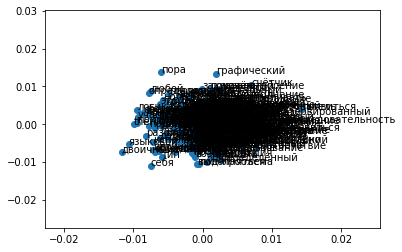

программирование
('константа', 0.33456045389175415)
('компиляция', 0.2373407930135727)
('арифметический', 0.2367437481880188)
('подпрограмма', 0.21616876125335693)
('который', 0.2061081975698471)
('проектирование', 0.20515692234039307)
('возникнуть', 0.19163715839385986)
('стать', 0.19003483653068542)
('различный', 0.1863129884004593)
('итерация', 0.18497073650360107)
это
('любой', 0.3256378471851349)
('этап', 0.2570303678512573)
('конструкция', 0.2478766292333603)
('например', 0.21452975273132324)
('оператор', 0.2041195034980774)
('понять', 0.20196229219436646)
('большинство', 0.19889025390148163)
('привести', 0.19805331528186798)
('разбиение', 0.19684311747550964)
('автономный', 0.19564950466156006)
процесс
('реляционный', 0.31929928064346313)
('число', 0.25219660997390747)
('программа', 0.24020805954933167)
('трудный', 0.22582238912582397)
('шаг', 0.2158132791519165)
('итерация', 0.20691774785518646)
('пользователь', 0.19300252199172974)
('выполнять', 0.1912032663822174)
('проявлять

('правильный', 0.25414228439331055)
('являться', 0.21398156881332397)
('результат', 0.2127918004989624)
('неправильный', 0.20872211456298828)
('пример', 0.1976695954799652)
('надёжность', 0.1810085028409958)
('совершить', 0.18095794320106506)
оборудование
('постусловие', 0.2683815360069275)
('именование', 0.24431446194648743)
('тип', 0.235066756606102)
('также', 0.22063006460666656)
('описание', 0.21935057640075684)
('мочь', 0.20219503343105316)
('false', 0.18207280337810516)
('версия', 0.17995047569274902)
('хранить', 0.17893385887145996)
('проблема', 0.17632782459259033)
программный
('какой-то', 0.26550382375717163)
('операция', 0.2554033696651459)
('по', 0.20823101699352264)
('оценка', 0.20766611397266388)
('распространить', 0.20072683691978455)
('полезно', 0.20020709931850433)
('реляционный', 0.18597504496574402)
('итерация', 0.18036365509033203)
('зарезервированный', 0.17414262890815735)
('большинство', 0.16415217518806458)
обеспечение
('управление', 0.24271899461746216)
('проверк

('else', 0.21260693669319153)
преобразовать
('хранить', 0.2576543092727661)
('близкий', 0.2565120458602905)
('получение', 0.234687939286232)
('тело', 0.2191648781299591)
('логический', 0.21504637598991394)
('реляционный', 0.2123304307460785)
('трудный', 0.21007323265075684)
('этап', 0.2018756866455078)
('удовлетворение', 0.20081105828285217)
('использоваться', 0.18605393171310425)
описать
('присваивание', 0.24655482172966003)
('оценка', 0.244906485080719)
('иметь', 0.24238437414169312)
('близкий', 0.21823199093341827)
('случай', 0.21206259727478027)
('постусловие', 0.1961500495672226)
('проявляться', 0.19502416253089905)
('решаться', 0.19225886464118958)
('необходимость', 0.18321287631988525)
('вид', 0.17888890206813812)
машинный
('постусловие', 0.29929715394973755)
('часть', 0.2618759274482727)
('then', 0.24769854545593262)
('инструкция', 0.23072314262390137)
('выполняться', 0.21938590705394745)
('блок-схема', 0.20925459265708923)
('for', 0.20180180668830872)
('написать', 0.2001740634

('обновление', 0.19562262296676636)
('под-проблема', 0.1955050528049469)
доработать
('проблема', 0.29529476165771484)
('функция', 0.2651793956756592)
('выражение', 0.2529286742210388)
('себя', 0.21111270785331726)
('true', 0.20930816233158112)
('тестирование', 0.20466794073581696)
('этот', 0.19542431831359863)
('длинный', 0.19099286198616028)
('случай', 0.182115375995636)
('присваивать', 0.18183167278766632)
получение
('появиться', 0.265798419713974)
('соответствие', 0.24203617870807648)
('преобразовать', 0.234687939286232)
('преобразование', 0.22112402319908142)
('определённый', 0.21409457921981812)
('действие', 0.20909199118614197)
('количество', 0.20595087110996246)
('требовать', 0.1984020471572876)
('удовлетворение', 0.196746364235878)
('инструкция', 0.19616033136844635)
обратный
('ошибка', 0.31021666526794434)
('далее', 0.2809181213378906)
('бинарный', 0.2448979765176773)
('решаться', 0.1969868540763855)
('компилятор', 0.19554130733013153)
('true', 0.18854588270187378)
('поддержка

In [34]:
#Обучение для вопросов и ответов
model = Word2Vec(answers, min_count=1)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

for word in model.wv.vocab:
    print(word)
    for n in model.wv.most_similar(word):
        print(n)
    
      

C:\Users\Mariia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


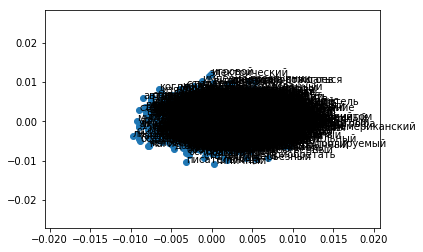

провокационный
('два', 0.32929083704948425)
('автобот', 0.3155617117881775)
('эмоция', 0.27489131689071655)
('приграничный', 0.2742350697517395)
('карл', 0.2729090452194214)
('год', 0.2723020017147064)
('превратить', 0.26904046535491943)
('регулярно', 0.2634959816932678)
('правоохранительный', 0.2627207636833191)
('мама', 0.26064333319664)
комедия
('аукционный', 0.3268895745277405)
('если', 0.3074647784233093)
('ярость', 0.2722732424736023)
('ичетэ', 0.27086588740348816)
('роттмайер', 0.268934428691864)
('обстоятельство', 0.2681756019592285)
('формулировка', 0.2656863033771515)
('обольщение', 0.26527082920074463)
('возлюбить', 0.2651175260543823)
('выбор', 0.2577691674232483)
волк
('ужас', 0.3249278962612152)
('между', 0.3027397692203522)
('лев', 0.29632729291915894)
('обращаться', 0.2915750741958618)
('пылать', 0.2846481502056122)
('дебют', 0.2700512409210205)
('белла', 0.26967719197273254)
('момент', 0.2690129280090332)
('микаэла', 0.26750123500823975)
('туча', 0.25619009137153625)
у

('дейв', 0.2753470540046692)
('несправедливый', 0.27167952060699463)
('тренер', 0.2714463472366333)
('представление', 0.26748403906822205)
('дух', 0.2655045986175537)
('кингслить', 0.26509347558021545)
('плохо', 0.2596930265426636)
круг
('выживание', 0.33515995740890503)
('олдмена', 0.3127617835998535)
('который', 0.29929447174072266)
('андре', 0.2983129918575287)
('арнольд', 0.29828906059265137)
('кокнер', 0.28870975971221924)
('дейв', 0.2840306758880615)
('леонид', 0.2821500301361084)
('миллионер', 0.27020207047462463)
('игумен', 0.2655685245990753)
зритель
('положительный', 0.33328309655189514)
('орган', 0.2987133860588074)
('сай-фай', 0.29667896032333374)
('нравиться', 0.2897942066192627)
('национальный', 0.2884273827075958)
('принять', 0.2848402261734009)
('сумасшедший', 0.28430646657943726)
('производство', 0.27775317430496216)
('отлично', 0.27669477462768555)
('фрая', 0.267658531665802)
любовный
('культовый', 0.4044938385486603)
('аарон', 0.353587806224823)
('многовековый', 0.33

('поворот', 0.27852872014045715)
('мид', 0.2760469615459442)
('соцсеть', 0.27596715092658997)
('трагикомедия', 0.2750001549720764)
('мария', 0.26960188150405884)
('робот-полицейский', 0.25815993547439575)
('бейнс', 0.2578878104686737)
('проститутка', 0.25507640838623047)
('вовлекаться', 0.253746896982193)
франшиза
('достигать', 0.29663485288619995)
('драйвовый', 0.27698808908462524)
('приграничный', 0.2724384665489197)
('половина', 0.2720126509666443)
('остаться', 0.26925235986709595)
('расследование', 0.2669468820095062)
('потерять', 0.2649387717247009)
('краткосрочный', 0.2633732259273529)
('арнольд', 0.2541322410106659)
('ловкий', 0.2485879808664322)
шаг
('попадать', 0.3369119465351105)
('какой', 0.321138858795166)
('минута', 0.2831469774246216)
('чертовщина', 0.27734577655792236)
('венсан', 0.2735517621040344)
('осторожно', 0.25335413217544556)
('обмен', 0.25295746326446533)
('юный', 0.24561402201652527)
('туретта', 0.2441619336605072)
('битва', 0.23932935297489166)
вперёд
('действ

('человечный', 0.3570716977119446)
('зек', 0.3364827036857605)
('покой', 0.3272840678691864)
('летерие', 0.31480225920677185)
('отвязнать', 0.3027873635292053)
('четырнадцать', 0.2988467812538147)
('рождаться', 0.29338449239730835)
('сбор', 0.2917684018611908)
('гигантский', 0.280983030796051)
('рыцарь', 0.2804388403892517)
путь
('дьявол', 0.32668524980545044)
('фантастический', 0.31025242805480957)
('марго', 0.29081761837005615)
('чёрный', 0.2748427093029022)
('помогать', 0.26983940601348877)
('никитин', 0.26483261585235596)
('ммкф', 0.26210275292396545)
('много', 0.2563282549381256)
('тимофей', 0.2529788017272949)
('леденящий', 0.24956725537776947)
глава
('разворачиваться', 0.31747400760650635)
('кунда', 0.3098565936088562)
('побег', 0.30922266840934753)
('ладожский', 0.3028576672077179)
('юрий', 0.29990917444229126)
('уолл-стрит', 0.2966722846031189)
('кейв', 0.28046441078186035)
('попадать', 0.26113957166671753)
('книга', 0.2574812173843384)
('событие', 0.25393152236938477)
кузьмин

('сценарий', 0.25832876563072205)
смотреть
('винс', 0.32088103890419006)
('севастополь', 0.3084043860435486)
('капитан', 0.30370068550109863)
('бед…', 0.3018101751804352)
('оказываться', 0.2890445590019226)
('хан', 0.2863832712173462)
('сцена', 0.28298255801200867)
('манипуляция', 0.27530378103256226)
('героиобводить', 0.26465946435928345)
('король', 0.259022057056427)
дипломный
('естественно', 0.34074726700782776)
('лейн', 0.2868947386741638)
('задумываться', 0.28290364146232605)
('попасть', 0.28120696544647217)
('женя', 0.28034815192222595)
('предмет', 0.27735745906829834)
('дампир', 0.274584025144577)
('погибать', 0.2700357735157013)
('наследник', 0.2582138180732727)
('тимофей', 0.2578481137752533)
практика
('великий', 0.3424258232116699)
('вести', 0.31236907839775085)
('раса', 0.2835921049118042)
('глобальный', 0.28101223707199097)
('шиэн', 0.2798558473587036)
('подарок', 0.2757090926170349)
('кинофестиваль', 0.2712585926055908)
('эпидемия', 0.26878371834754944)
('белен', 0.2610349

('джон', 0.2502214014530182)
('оттуда', 0.24798089265823364)
йоханссон
('роберт', 0.33448395133018494)
('поздний', 0.3152744770050049)
('безумный', 0.3078378140926361)
('масштабный', 0.28991439938545227)
('игровой', 0.278320848941803)
('сумасшедший', 0.27294284105300903)
('яркий', 0.2723519504070282)
('захватывать', 0.2593880891799927)
('сам', 0.2592005729675293)
('компьютерный', 0.249448761343956)
воплотить
('иметься', 0.34300702810287476)
('роза', 0.3069968819618225)
('снайперш', 0.30595046281814575)
('край', 0.30566513538360596)
('репосты…', 0.2899108827114105)
('разгадать', 0.2880248725414276)
('однокашник', 0.2795614004135132)
('роль', 0.27936604619026184)
('школе…', 0.27532514929771423)
('взаимность', 0.25786566734313965)
робот-полицейский
('артефакт', 0.3095129728317261)
('кристмас', 0.28682082891464233)
('мистика', 0.27990958094596863)
('сержант', 0.2769135534763336)
('штат', 0.2681416869163513)
('находить', 0.26065942645072937)
('создатель', 0.25815993547439575)
('морой', 0.25

('грозить', 0.31496384739875793)
('резко', 0.2950325012207031)
('знаменитый', 0.29491865634918213)
('киллиана', 0.2819369435310364)
('горько', 0.2818242609500885)
('джейн', 0.2769739627838135)
('долго', 0.27636998891830444)
('именно', 0.2711201012134552)
('случиться', 0.2707868814468384)
('давать', 0.2700960636138916)
никуда
('французский', 0.3567665219306946)
('спецслужба', 0.35273224115371704)
('дурак', 0.2827723026275635)
('галактика', 0.27555176615715027)
('сан-франциско', 0.27228179574012756)
('туретта', 0.2671952247619629)
('представление', 0.2656390964984894)
('давать', 0.2617623805999756)
('прогонять', 0.2581067383289337)
('рисовать', 0.25228288769721985)
окно
('выбрать', 0.32330745458602905)
('французский', 0.29715418815612793)
('пытать', 0.2949400544166565)
('влюбиться', 0.2870752811431885)
('бена', 0.27894216775894165)
('выгодно', 0.2789067327976227)
('даниэль', 0.27883264422416687)
('творческий', 0.2721896767616272)
('грозить', 0.2706983685493469)
('райт', 0.262576460838317

('техника', 0.3553897738456726)
('особняк', 0.3315402865409851)
('фортитьюд', 0.32191240787506104)
('король', 0.3021615445613861)
('садист', 0.2823638916015625)
('многообещающий', 0.2783002257347107)
('мастерство', 0.267052561044693)
('киноопыт', 0.26261642575263977)
('обрести', 0.262264221906662)
('вернуться', 0.2582542300224304)
брендать
('сбываться', 0.32349908351898193)
('паранормальный', 0.2827351987361908)
('возглавить', 0.27967554330825806)
('прочность', 0.26562750339508057)
('вынудить', 0.26017826795578003)
('момент', 0.2570935785770416)
('заручиться', 0.25698184967041016)
('картина-катастрофа', 0.25530800223350525)
('мгб', 0.24936717748641968)
('приводить', 0.2490403950214386)
давно
('десять', 0.36416301131248474)
('июнь', 0.3171456754207611)
('драгомир', 0.31405046582221985)
('когда', 0.307572603225708)
('сериал', 0.29185253381729126)
('смириться', 0.2888948917388916)
('роба', 0.27896010875701904)
('угнать', 0.2644297480583191)
('бесценок', 0.25841668248176575)
('лабутена', 0

('участник', 0.30418917536735535)
('впутать', 0.29676464200019836)
('империя', 0.28332000970840454)
('художник', 0.2803659439086914)
('вовсе', 0.2732315957546234)
('штат', 0.27220988273620605)
('широкий', 0.2714463472366333)
('роттмайер', 0.2611665427684784)
('пронзительный', 0.2546134889125824)
('суровый', 0.24568921327590942)
спортивный
('книга', 0.36522752046585083)
('посреди', 0.33977562189102173)
('редкий', 0.29995039105415344)
('благодать', 0.288563996553421)
('представление', 0.28806084394454956)
('выяснять', 0.2810155153274536)
('героиобводить', 0.2802027463912964)
('роберт', 0.27790459990501404)
('вкус', 0.26709502935409546)
('терять', 0.26011407375335693)
получить
('повествование', 0.33176741003990173)
('философский', 0.3038802146911621)
('роман', 0.2947799563407898)
('драгомир', 0.28587472438812256)
('комедийный', 0.2617231607437134)
('приглашать', 0.25843754410743713)
('многочисленный', 0.2530357837677002)
('карта', 0.2490215003490448)
('регулярно', 0.24554699659347534)
('в

('сан-франциско', 0.3613354563713074)
('режиссёр', 0.3251579701900482)
('прогонять', 0.315454363822937)
('происхождение', 0.30730634927749634)
('дэвид', 0.3069014549255371)
('объединить', 0.29851287603378296)
('грань', 0.2900746464729309)
('видимый', 0.2852247357368469)
('комедийный', 0.2748783230781555)
('маг', 0.26826539635658264)
праздновать
('почему', 0.31636345386505127)
('встреча', 0.30954232811927795)
('плюшевый', 0.291003942489624)
('наш', 0.282359778881073)
('бояться…', 0.2712779641151428)
('игровой', 0.26587098836898804)
('джузеппе', 0.26267483830451965)
('десептикона', 0.25921890139579773)
('мёртвый', 0.25349345803260803)
('существо', 0.24859437346458435)
юбилей
('многолетний', 0.3385482430458069)
('километр', 0.31082865595817566)
('утратить', 0.2955866754055023)
('лежать', 0.29532527923583984)
('шокировать', 0.29452264308929443)
('север', 0.28328633308410645)
('игумен', 0.28279340267181396)
('уникальный', 0.27318939566612244)
('краснознамённый', 0.2706758379936218)
('отпуск

('режим', 0.3193615972995758)
('посреди', 0.31794142723083496)
('детализировать', 0.29933249950408936)
('тестировать', 0.2905306816101074)
('идти', 0.2832498252391815)
('передавать', 0.27818286418914795)
('одесса', 0.269125759601593)
('оказываться', 0.2668405771255493)
('случай', 0.2562407851219177)
('консультировать', 0.2498631626367569)
обвинить
('извратить', 0.4093756079673767)
('наркотик', 0.37164634466171265)
('правдоподобно', 0.3248618245124817)
('коварный', 0.2853032648563385)
('сан-франциско', 0.2838682234287262)
('шаман', 0.27694639563560486)
('комедийный', 0.2712109088897705)
('борьба', 0.2711813747882843)
('обмен', 0.26742827892303467)
('разворачиваться', 0.2643825113773346)
обречь
('задумываться', 0.3256797790527344)
('представление', 0.2901361286640167)
('бондурант', 0.2762678861618042)
('поэтому', 0.2706807553768158)
('финансист', 0.2608868479728699)
('мужчина', 0.2578543424606323)
('сбежать', 0.25721752643585205)
('наказать', 0.25184348225593567)
('сплошной', 0.248607605

('наследник', 0.32227930426597595)
('возможный', 0.30278480052948)
('честной', 0.3011799156665802)
('спустя', 0.2891623079776764)
('парный', 0.2685871124267578)
('маг', 0.26800787448883057)
('настоящий', 0.264626681804657)
('подходящий', 0.263388067483902)
('взаимный', 0.2623632252216339)
('особняк', 0.2611730694770813)
раздолбать
('следователь', 0.31117647886276245)
('рекорд', 0.2833886444568634)
('решить', 0.27903586626052856)
('день', 0.2775505781173706)
('лайк', 0.2718316912651062)
('авантюрист', 0.26919856667518616)
('наоми', 0.2670127749443054)
('доспех', 0.26699209213256836)
('трансформироваться', 0.2603113651275635)
('портоса', 0.2582104802131653)
малкольм
('твой', 0.2846900522708893)
('мэр', 0.27462995052337646)
('мёртвый', 0.27323609590530396)
('батальный', 0.2700883746147156)
('краснознамённый', 0.2673969268798828)
('гнёздышко', 0.26595810055732727)
('навязчивый', 0.26292285323143005)
('аварийно-спасательный', 0.2571694552898407)
('кэвизеть', 0.2536841034889221)
('очередной'

('похищать', 0.39308732748031616)
('логово', 0.3800604045391083)
('австралия', 0.33015477657318115)
('родные', 0.3090280592441559)
('навислый', 0.273752897977829)
('xix', 0.268579363822937)
('скорость', 0.26775887608528137)
('видеомор', 0.26578289270401)
('рэть', 0.25903159379959106)
('дьявол', 0.25868916511535645)
человечество
('обратиться', 0.31563103199005127)
('любимый', 0.30103200674057007)
('харди', 0.2927863597869873)
('путешествие', 0.2771332263946533)
('это', 0.27201759815216064)
('понести', 0.26389575004577637)
('военный', 0.26244544982910156)
('нервный', 0.2602281868457794)
('менять', 0.25922393798828125)
('школьный', 0.2537078857421875)
глобальный
('прийтись', 0.28465619683265686)
('практика', 0.28101223707199097)
('левый', 0.270465612411499)
('хвост', 0.26737797260284424)
('зек', 0.267243891954422)
('четырнадцать', 0.26257604360580444)
('мартин', 0.2612685561180115)
('дэвис', 0.2598828673362732)
('зоя', 0.25862789154052734)
('винсент', 0.2557051479816437)
катастрофа
('трат

восемнадцатилетний
('орсон', 0.348612904548645)
('спецслужба', 0.3344615697860718)
('она', 0.3131369948387146)
('наделить', 0.3025555908679962)
('миррен', 0.2844812572002411)
('выживание', 0.26488614082336426)
('полгода', 0.26021072268486023)
('игровой', 0.2593870460987091)
('удаваться', 0.25270015001296997)
('широкий', 0.24839647114276886)
рождение
('баттерфилд', 0.32380661368370056)
('здание', 0.3046959936618805)
('финансист', 0.3026812672615051)
('приблизить', 0.2999412715435028)
('олдман', 0.2961248755455017)
('бес', 0.2907002866268158)
('плохо', 0.28743308782577515)
('сержант', 0.2848920226097107)
('пытать', 0.2820844352245331)
('особо', 0.2625851631164551)
разлить
('александр', 0.3723672330379486)
('половина', 0.3002420663833618)
('режиссёр', 0.2909252345561981)
('одуматься', 0.28844571113586426)
('подкидывать', 0.2822537422180176)
('морой', 0.2705223560333252)
('лить', 0.26560646295547485)
('умный', 0.26386603713035583)
('свет', 0.25946295261383057)
('видимый', 0.257934600114822

('объединить', 0.2525719702243805)
('очередной', 0.24931101500988007)
встречать
('мальчишник', 0.38831639289855957)
('юмор', 0.3060380518436432)
('задание', 0.2978593111038208)
('гарри', 0.28939250111579895)
('продолжать', 0.2888522744178772)
('рустам', 0.28486719727516174)
('утратить', 0.2734687924385071)
('шикарный', 0.26620349287986755)
('ярость', 0.25816044211387634)
('одноклассник', 0.2565786838531494)
лютый
('шанс', 0.29356175661087036)
('кома', 0.2900267541408539)
('беликов', 0.287978857755661)
('стоить', 0.2829173505306244)
('галактика', 0.2826959788799286)
('выяснять', 0.27914756536483765)
('создать', 0.2783935070037842)
('захватывать', 0.2781868278980255)
('известно', 0.26601845026016235)
('хоббс', 0.2580544352531433)
мороз
('хотеть', 0.3988378047943115)
('хирург', 0.34490495920181274)
('мужчина', 0.275506854057312)
('агент', 0.2657046616077423)
('графф', 0.2622796595096588)
('роль', 0.2587651014328003)
('нервный', 0.25576427578926086)
('кишеть', 0.2540278136730194)
('ринг', 

('готический', 0.25921911001205444)
('горожанин', 0.2583548426628113)
('пропускать', 0.2577347159385681)
эпицентр
('дружить', 0.3819143772125244)
('консультировать', 0.3088524341583252)
('доходить', 0.30649328231811523)
('автобот', 0.28847381472587585)
('зловещий', 0.2791520655155182)
('ночь', 0.2785632908344269)
('обстоятельство', 0.2746671438217163)
('пойти', 0.267309308052063)
('вжиться', 0.26550352573394775)
('красный', 0.2634350061416626)
многовековый
('любовный', 0.33023589849472046)
('хилла', 0.32262125611305237)
('культовый', 0.2738751769065857)
('киллиана', 0.2682933509349823)
('старый', 0.26618969440460205)
('после', 0.25428956747055054)
('аппетит', 0.25241827964782715)
('шпионаж', 0.25150948762893677)
('сообщник', 0.24836397171020508)
('сделать', 0.24651186168193817)
противостояние
('исторический', 0.32703524827957153)
('рыцарь', 0.3204314708709717)
('спустя', 0.3063451051712036)
('сильный', 0.3005371689796448)
('hd', 0.2899588942527771)
('чендлера', 0.2865642309188843)
('эк

('россия', 0.27837514877319336)
('вергилий', 0.2699432075023651)
('вечно', 0.25944778323173523)
('главное', 0.25199228525161743)
('навевать', 0.24977532029151917)
впереди
('лишиться', 0.3514668047428131)
('дэвис', 0.34793224930763245)
('ммкф', 0.32238033413887024)
('назвать', 0.31071385741233826)
('бывший', 0.3052937090396881)
('выбрать', 0.29123419523239136)
('предательство', 0.2697792053222656)
('честной', 0.25838351249694824)
('развлекатель', 0.25466465950012207)
('династия', 0.25457316637039185)
война
('нелегальный', 0.3526366055011749)
('отлично', 0.32570314407348633)
('презреть', 0.31895431876182556)
('киценко', 0.3107838034629822)
('отбираться', 0.30210059881210327)
('зомби', 0.2901008725166321)
('биография', 0.2868422865867615)
('пора', 0.2630866765975952)
('рождаться', 0.26271137595176697)
('проповедник', 0.2606155276298523)
инопланетный
('девятиэтажка', 0.29996079206466675)
('оскар', 0.2958243191242218)
('олдман', 0.2857365608215332)
('честейн', 0.2710501551628113)
('контраба

('кутюра', 0.29134559631347656)
('зритель', 0.28484025597572327)
('потеря', 0.272877037525177)
('подозрительно', 0.2709677219390869)
('корабль', 0.2690192461013794)
('уитвикки', 0.26262912154197693)
пойти
('нечеловеческий', 0.33601880073547363)
('рэкхема', 0.33003392815589905)
('притча', 0.3228091597557068)
('участок', 0.3175491690635681)
('действительность', 0.3104894161224365)
('готовый', 0.2982734739780426)
('сознание', 0.2981342673301697)
('выяснять', 0.2909657657146454)
('киноальманах', 0.2906457185745239)
('бедос', 0.28724682331085205)
риск…
('остановить', 0.3717857599258423)
('ян', 0.3095162510871887)
('снегурочка', 0.30616939067840576)
('гречь', 0.30212223529815674)
('шериф', 0.28878092765808105)
('ключ', 0.28209853172302246)
('корея', 0.28024691343307495)
('фрик', 0.2762795388698578)
('помогать', 0.27101805806159973)
('александр', 0.26872336864471436)
видемор
('доу', 0.38160818815231323)
('плохо', 0.3446413278579712)
('многообещающий', 0.3172280192375183)
('десептиконовый', 0.

('новогодний', 0.30683398246765137)
('элемент', 0.30087119340896606)
('нервный', 0.2935348153114319)
('горько', 0.29219257831573486)
('спортивный', 0.2802027463912964)
('обходиться', 0.27992162108421326)
('родные', 0.2779124677181244)
('кинофестиваль', 0.27638351917266846)
палец
('особняк', 0.3412574231624603)
('готический', 0.3351282775402069)
('бесконечный', 0.32699424028396606)
('игровой', 0.29137325286865234)
('опознать', 0.2816164493560791)
('элемент', 0.276650071144104)
('управлять', 0.2761360704898834)
('взаимный', 0.2693798243999481)
('тратить', 0.2532317638397217)
('нечеловеческий', 0.2517998218536377)
очередной
('плюшевый', 0.3752976655960083)
('эми', 0.31425005197525024)
('красный', 0.30744606256484985)
('приключение', 0.27589964866638184)
('эллис', 0.27558088302612305)
('молодость', 0.26617926359176636)
('монах', 0.26228800415992737)
('быстро', 0.2590346932411194)
('кинотеатральный', 0.255975604057312)
('мёртвый', 0.25433287024497986)
миллионер
('зоя', 0.3268349766731262)
(

('популярный', 0.3032417297363281)
('скорость', 0.29348450899124146)
('винс', 0.28836965560913086)
('мочь', 0.28324779868125916)
('аткинс', 0.2675199508666992)
('кик', 0.2580697536468506)
('тереза', 0.255016028881073)
('аварийно-спасательный', 0.2499859631061554)
('индийский', 0.24913723766803741)
обрастать
('тёрнер', 0.3544316291809082)
('кейт', 0.3309670090675354)
('мужчина', 0.3199206292629242)
('имя', 0.31631410121917725)
('австралийский', 0.31601589918136597)
('чёрный', 0.31271421909332275)
('момент', 0.30470678210258484)
('приезжать', 0.2833635210990906)
('мма', 0.2766796946525574)
('кажется', 0.2751927375793457)
великое
('сталинский', 0.36749887466430664)
('ммкф', 0.3144201636314392)
('фрая', 0.29779112339019775)
('дэвис', 0.2918238043785095)
('город', 0.2837755084037781)
('кузьмин', 0.28223443031311035)
('шанс', 0.2779195308685303)
('преступник', 0.27643778920173645)
('техника', 0.2635815441608429)
('верный', 0.2623727023601532)
полотно
('обучение', 0.311988890171051)
('лечебни

взлёт
('некоторый', 0.32673826813697815)
('коммерческий', 0.3018776774406433)
('xix', 0.3015698790550232)
('парный', 0.2882815897464752)
('элемент', 0.28456950187683105)
('имя', 0.28186577558517456)
('мастер', 0.2740243673324585)
('команда', 0.270664244890213)
('вампир', 0.26735571026802063)
('принцесса', 0.2631151080131531)
падение
('команда', 0.3215888738632202)
('великий', 0.31667205691337585)
('настоящее', 0.3068513870239258)
('череда', 0.3014422655105591)
('преступник', 0.2961827516555786)
('дэниелс', 0.2932848334312439)
('кинг', 0.28790083527565)
('бесплатно', 0.2877885699272156)
('мамаша', 0.2848817706108093)
('например', 0.2799231708049774)
характерный
('сообщник', 0.3517010807991028)
('пародия', 0.3160964846611023)
('киллиана', 0.28454849123954773)
('собственный', 0.2797401249408722)
('типичный', 0.27857938408851624)
('подводный', 0.27799147367477417)
('эксцентричный', 0.2664189040660858)
('игумен', 0.2660452127456665)
('фэнтези', 0.26471832394599915)
('сопровождаться', 0.2629

('гэтсби', 0.2641974687576294)
наступление
('элемент', 0.286546915769577)
('планировать', 0.28502580523490906)
('проникнуться', 0.2820620536804199)
('арман', 0.2782532572746277)
('снятой', 0.2654964029788971)
('успокоиться', 0.2565382122993469)
('нелепый', 0.2534673810005188)
('уитвика', 0.2476418912410736)
('лить', 0.24690431356430054)
('головокружительный', 0.24301984906196594)
поэтому
('французский', 0.2969420552253723)
('объект', 0.2935243844985962)
('финансист', 0.2917059063911438)
('пара', 0.28934532403945923)
('знакомство', 0.2813641428947449)
('кинотеатральный', 0.2764933109283447)
('как', 0.2737218141555786)
('обречь', 0.2706807553768158)
('техника', 0.2652190029621124)
('трагически', 0.26125815510749817)
обучать
('навещать', 0.4154888391494751)
('юмор', 0.3798583745956421)
('регулярно', 0.2896718978881836)
('грозить', 0.28769004344940186)
('брокер-авантюрист', 0.2624090611934662)
('шеридать', 0.2586824893951416)
('разгульный', 0.25343745946884155)
('действовать', 0.2505117654

('вымысел', 0.24220038950443268)
('погибнуть', 0.2404220998287201)
('адельмана', 0.23990704119205475)
дэниелс
('десятилетний', 0.3763929009437561)
('мамаша', 0.34116894006729126)
('пропасть', 0.3268890678882599)
('камень', 0.3026570975780487)
('падение', 0.2932848334312439)
('безумный', 0.29218557476997375)
('сила', 0.2771519422531128)
('звонить', 0.2705767750740051)
('всеобщий', 0.267983078956604)
('ехать', 0.2519776225090027)
навещать
('обучать', 0.4154888391494751)
('элита', 0.32218581438064575)
('наравне', 0.30334392189979553)
('карл', 0.29998859763145447)
('франклин', 0.286403089761734)
('внутренний', 0.28455352783203125)
('перерастать', 0.2708546221256256)
('признаваться', 0.2674075961112976)
('начинать', 0.26687514781951904)
('гэтсби', 0.2653154730796814)
ллойд
('брукса', 0.32993462681770325)
('интересный', 0.27120116353034973)
('планета', 0.2668810784816742)
('маг', 0.2556338310241699)
('хеллена', 0.2529163360595703)
('прилетать', 0.25209468603134155)
('детишки', 0.247963517904

('кейт', 0.2706913948059082)
('рустам', 0.2699336111545563)
('социалистический', 0.2636876106262207)
('фокс', 0.2600909471511841)
деформация
('начинать', 0.33333659172058105)
('поспорить', 0.3082016706466675)
('овер-сюр-уаз', 0.3001575767993927)
('удивительный', 0.29185181856155396)
('шеридать', 0.2810632586479187)
('безумный', 0.27736571431159973)
('джексон', 0.2772926688194275)
('с', 0.27090194821357727)
('дева', 0.27079299092292786)
('подлинный', 0.2621098756790161)
тем
('переносить', 0.299269437789917)
('роберт', 0.28624439239501953)
('генерал', 0.28180456161499023)
('марлон', 0.27796030044555664)
('два', 0.2748986780643463)
('иван', 0.27128103375434875)
('смерть', 0.27032727003097534)
('джудить', 0.26240232586860657)
('банка', 0.25497740507125854)
('подлинный', 0.25345492362976074)
шагом
('мастерство', 0.28142470121383667)
('хранить', 0.2757059335708618)
('неподражаемый', 0.27403974533081055)
('рэйчел', 0.2630983591079712)
('десептикона', 0.2624127268791199)
('живой', 0.2622744143

In [33]:
#Обучение для фильмов
model2 = Word2Vec(descriptions, min_count=1)
X = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

for word in model2.wv.vocab:
    print(word)
    for n in model2.wv.most_similar(word):
        print(n)
    
      

In [75]:
def tf_idf_plus_word2vec(tasks, sentences):
    model = Word2Vec(sentences, min_count=1)
    s=[]
    for sentence in sentences:
        z=' '.join(sentence)
        s.append(z)
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(s)
    vector=[list(i) for i in csr_matrix(X).toarray()]
    #print(vectorizer.get_feature_names())
    true_answers=0
    for j, task in enumerate(tasks):       
        z=' '.join(task)
        t=csr_matrix(vectorizer.transform([z])).toarray()[0]
        for w in task:
            for i, word in enumerate(vectorizer.get_feature_names()):
                if (word in model.wv.vocab and w in model.wv.vocab):
                    t[i]=t[i]+model.wv.similarity(word, w)/5
        #print(t)
        results=[]
        for i, sentence in enumerate(sentences):
            results.append(scipy.spatial.distance.cosine(t, vector[i]))
        #print(results)
        minim=1
        mini=-1
        for i, a in enumerate(results):
            if a<minim:
                mini=i
                minim=a
        print(j, mini)
        if (mini==j):
            true_answers=true_answers+1
    return true_answers

In [76]:
#Вопросы и ответы
print(tf_idf_plus_word2vec(questions, answers)/len(questions)*100)

0 27
1 18
2 2
3 3
4 3
5 3
6 3
7 7
8 8
9 0
10 10
11 11
12 15
13 15
14 13
15 15
16 16
17 1
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 20
26 26
27 27
28 27
29 28
30 30
31 31
32 32
33 0
34 8
57.14285714285714


In [77]:
#Фильмы и описания
print(tf_idf_plus_word2vec(films, descriptions)/len(films)*100)

0 0
1 1
2 2
3 8
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 6
13 -1
14 11
15 -1
16 23
17 17
18 18
19 -1
20 6
21 21
22 24
23 23
24 23
25 -1
26 22
27 27
28 28
29 31
30 -1
31 -1
32 32
54.54545454545454


Данный способ оказался чуть более эффективен для текстов на одинаковую тему (с похожим набором слов) (было 54%, стало 57%) и чуть менее эффективен для текстов на разную тему (с разным набором слов) (было 57,5%, стало 54,5%), чем обычный tf-idf или счетчик.
Это связано с тем, что на текстах с похожим наборов слов, Word2Vec лучше обучается.

Таким  образом, можно сделать вывод о том, что для похожих текстов (с похожим набором слов, терминов), лучше использовать Word2Vec.
Тогда как для текстов на разную тематику луче использовать счетчик или tf-idf.